Predicción de Diabetes con Regresión Logística -– Heart Disease Cleveland UCI
Eduardo Andres Enciso Gomez
Analisis de Datos
Codigo:202016908_84
UNAD

1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/unad/heart_cleveland_upload.csv')

In [5]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(60)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [7]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

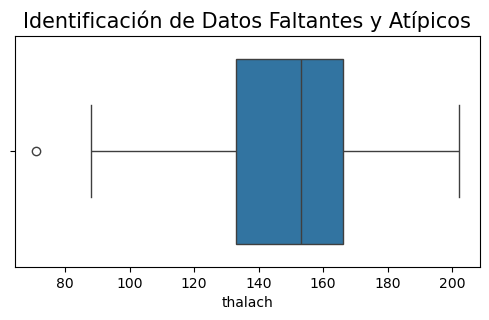

In [9]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['thalach'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=15 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

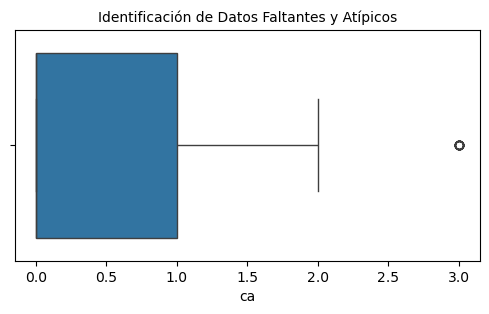

In [11]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['ca'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

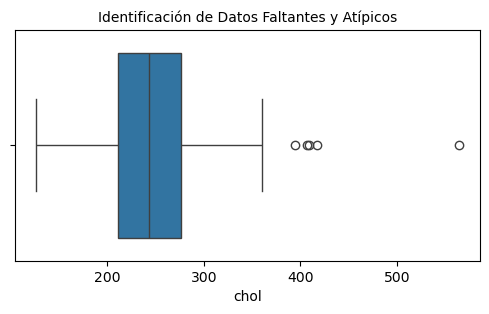

In [13]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

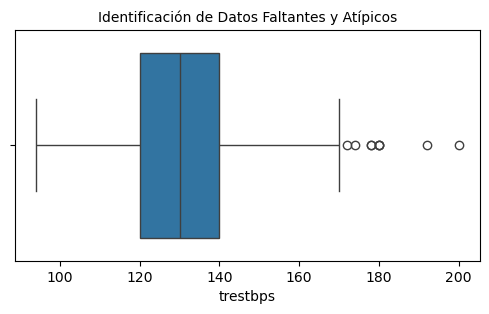

In [15]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [17]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())

Cantidad de Registros con cero en cp:  23
Cantidad de Registros con cero en fbs:  254
Cantidad de Registros con cero en restecg:  147
Cantidad de Registros con cero en oldpeak:  96
Cantidad de Registros con cero en slope:  139
Cantidad de Registros con cero en ca:  174


In [39]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['slope']=Datos['ca'].replace(0,Datos['ca'].mean())

In [41]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())

Cantidad de Registros con cero en cp:  0
Cantidad de Registros con cero en fbs:  0
Cantidad de Registros con cero en restecg:  0
Cantidad de Registros con cero en oldpeak:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en ca:  174


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

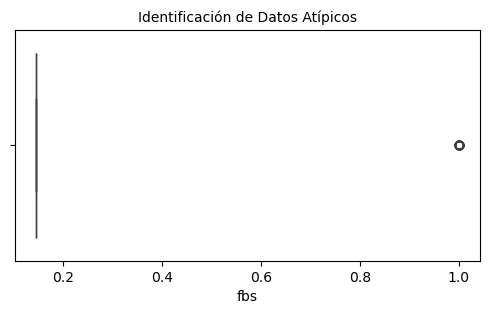

In [47]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['fbs'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [49]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=30
Total_Atipicos=((Datos['fbs']<nivel_minimo)|(Datos['fbs']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 297


In [51]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['fbs']<nivel_maximo)&(Datos['fbs']>nivel_minimo)]

In [53]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['fbs']<nivel_minimo)|(Datos['fbs']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [55]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      int64  
 2   cp         0 non-null      float64
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      float64
 6   restecg    0 non-null      float64
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      int64  
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      float64
 11  ca         0 non-null      int64  
 12  thal       0 non-null      int64  
 13  condition  0 non-null      int64  
dtypes: float64(5), int64(9)
memory usage: 0.0 bytes


3 .Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [ ]:
Característica de interes:

    Diabetico: si la persona tiene condition o no (0 = no tiene condition - 1 = si tiene condition)
    Predecir si una persona puede tener  condition



In [19]:
# Total de personas con  enfermedad cardíaca

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

4 .Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [21]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna condition
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna condition

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [23]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [25]:
print (X_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
185   62    0   3       140   268    0        2      160      0      3.6   
157   70    1   3       145   174    0        0      125      1      2.6   
110   54    0   2       135   304    1        0      170      0      0.0   
39    56    1   1       130   221    0        2      163      0      0.0   
198   60    1   3       130   206    0        2      132      1      2.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
278   45    1   3       115   260    0        2      185      0      0.0   
163   67    1   3       100   299    0        2      125      1      0.9   
137   44    0   2       108   141    0        0      175      0      0.6   
33    57    0   1       130   236    0        2      174      0      0.0   
246   54    1   3       110   239    0        0      126      1      2.8   

     slope  ca  thal  
185      2   2     0  
157      2   0     2  
110      0   0    

5 .Entrenar el modelo configurando los diferentes hiperparámetros

In [27]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [29]:
X_test.head(60)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0
157,70,1,3,145,174,0,0,125,1,2.6,2,0,2
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0
39,56,1,1,130,221,0,2,163,0,0.0,0,0,2
198,60,1,3,130,206,0,2,132,1,2.4,1,2,2
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0
202,60,1,3,140,293,0,2,170,0,1.2,1,2,2
285,43,1,3,150,247,0,0,171,0,1.5,0,0,0
272,46,0,3,138,243,0,2,152,1,0.0,1,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2


In [31]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


6 .Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [33]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



7 .Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

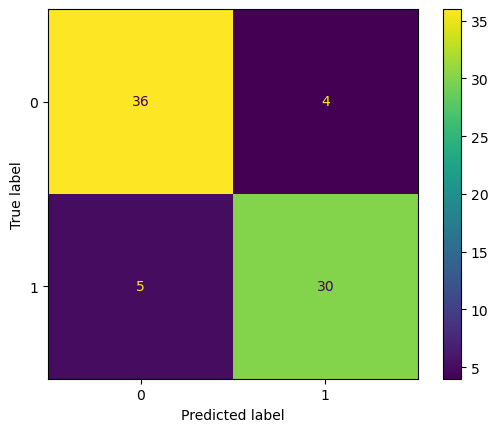

In [35]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

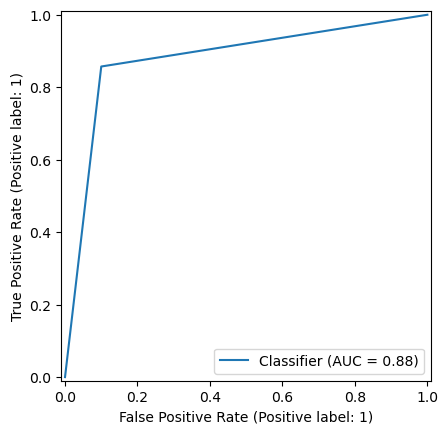

In [37]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

8 .Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "enfermeda condition" es 0,88, lo que significa que el 88% de los predichos como diabéticos por el modelo eran en realidad diabéticos.

Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "enfermeda condition" es 0,86, lo que indica que el modelo identificó correctamente al 86% de todos los diabéticos.

F1 Score: Es la media armónica de precisión y recall. Proporciona una puntuación única que equilibra la precisión y recall. Aquí la puntuación F1 para la clase " enfermeda condition" es 0,87, lo que indica un equilibrio entre precisión y recall.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 36

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 30

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 4

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 5

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,71 lo que significa que el 71% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.

